# Домашнє завдання
Дане домашнє завдання буде повністю пов'язане з лінійною регресією та її реалізацією. Отож розіб'ємо наше домашнє завдання на декілька частин:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [2]:
def lin_reg_func(w, x):
    return x.dot(w)

створіть функцію для обчислення функції втрат у векторному вигляді;

In [3]:
def loss_func(h, y):
    loss = (h - y) ** 2 / (2 * y.shape[0])
    loss = loss.sum() ** (1/2)
    return loss.values

реалізуйте один крок градієнтного спуску;

In [4]:
data = pd.read_csv("Housing.csv")

In [5]:
m = data.shape[0]
x = data[["area", "bathrooms", "bedrooms"]].astype(float)
x.insert(0, "x_0", np.ones(m))
y = pd.DataFrame(data["price"].values.astype(float))
w_prev = pd.DataFrame(np.random.randint(-1e6, 1e6, size=(x.shape[1])), index=x.columns, dtype=float)
LEARNING_RATE = 1e-8
x_t = x.T
J = x_t.dot(x.dot(w_prev) - y) / m
w = w_prev - LEARNING_RATE * J

Початкові параметри:

In [6]:
w_prev

,0
x_0,298978.0
area,88778.0
bathrooms,-621809.0
bedrooms,622462.0


Параметри після одного кроку:

In [7]:
w

,0
x_0,298973.461671
area,61251.327767
bathrooms,-621815.019098
bedrooms,622448.330216


знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [8]:
def grad_descent(w, x, y, num_iter, learning_rate, epsilon = 1e-8):

    m = x.shape[0]
    x_t = x.T
    loss = loss_func(lin_reg_func(w, x), y)
    loss_history = [loss]

    for i in range(num_iter):
      J = x_t.dot(x.dot(w) - y) / m
      w = w - learning_rate * J
      loss = loss_func(lin_reg_func(w, x), y)
      loss_history.append(loss)
      if abs(loss - loss_history[-2]) / loss < epsilon:
        break

    return w, i, loss_history

Початкові параметри:

In [9]:
w = pd.DataFrame(1e3 * np.ones(x.shape[1]), index=x.columns, dtype=float)
w

,0
x_0,1000.0
area,1000.0
bathrooms,1000.0
bedrooms,1000.0


In [10]:
w, i, loss_history = grad_descent(w, x, y, 10000, learning_rate = 1e-9)

Оптимізовані параметри:

In [11]:
w

,0
x_0,1000.052476
area,854.997851
bathrooms,1000.131438
bedrooms,1000.217689


Кількість ітерацій та остаточне значення функції втрат:

In [12]:
i, loss_history[-1][0]

(212, 1292631.0092073057)

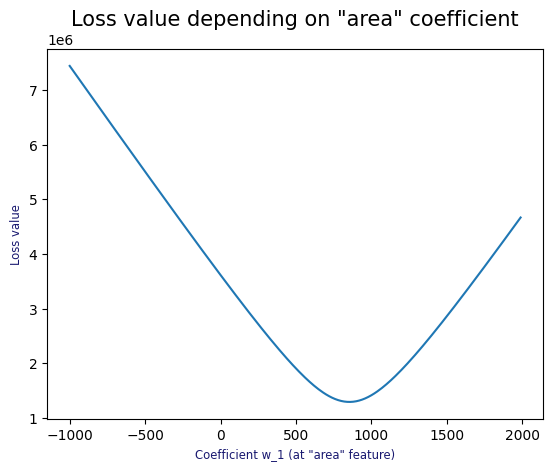

In [13]:
xx = pd.DataFrame(np.arange(-1e3, 2e3, 1e1))
ww = pd.DataFrame([w[0] for i in range(xx.shape[0])])
ww["area"] = xx.values
ww = ww.T
ll = loss_func(lin_reg_func(ww, x), y)
plt.plot(xx, ll, label='day temperature')
plt.xlabel('Coefficient w_1 (at "area" feature)', fontsize='small', color='midnightblue')
plt.ylabel('Loss value', fontsize='small', color='midnightblue')
plt.title('Loss value depending on "area" coefficient', fontsize=15)
plt.show()

Як видно з результату роботи алгоритму градієнтного спуску усі коефіцієнти моделі, крім коефіцієнта при змінній, що відповідає площі будинка, майже не змінилися в процесі його роботи, хоча й нам вдалося досягти локального мінімуму функції втрат. Це видно з графіка вище, де по осі X відкладені різні значення коефіцієнта при змінній, що відповідає площі будинка, при зафіксованих інших коефіцієнтах, а по осі Y значення функції втрат (середнє квадратичне по всім семплам) для данного сету коефіцієнтів.

знайдіть ці ж параметри за допомогою аналітичного рішення;

In [14]:
x_t = x.T
tmp = x_t.dot(x)
tmp = pd.DataFrame(np.linalg.inv(tmp.values), tmp.columns, tmp.index)
tmp = tmp.dot(x_t)
w1 = tmp.dot(y)

In [15]:
w2 = pd.DataFrame(np.linalg.pinv(x.values), x.columns, x.index).dot(y)

порівняйте отримані результати.

Значення коефіцієнтів, знайдених за допомогою аналітичного рішення двома еквівалентними способами:

In [16]:
w1

,0
x_0,-1.731716e+05
area,3.787628e+02
bathrooms,1.386049e+06
bedrooms,4.068200e+05


In [17]:
w2

,0
x_0,-1.731716e+05
area,3.787628e+02
bathrooms,1.386049e+06
bedrooms,4.068200e+05


Значення функції втрат для сету коефіцієнтів, знайдених за допомогою аналітичного рішення:

In [18]:
loss_func(lin_reg_func(w1, x), y)[0]

946353.5412247685

Як бачимо, значення похибки в цьому випадку нижче на майже 37%, хоча й залишається достатньо великим. Можна було б очікувати, що аналітичне рішення дозволить знизити похибку майже до нуля, але це могло б сталися, якби матричне рівняння з коефіцієнтами, ознаками та таргетом мало розв'язок. Натомість це не відповідає нашому кейсу (як і ймовірно будь-якому кейсу з реальними даними). Відтак, проблема потребує подальшого дослідження.